In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
rei_data=pd.read_csv('../clean_data/rei_data.csv')
total_annual = pd.read_csv('../clean_data/total_annual.csv')

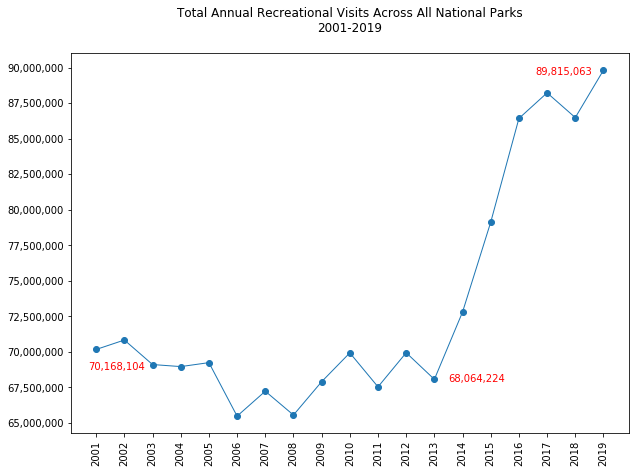

In [3]:
x_axis=total_annual['Year']
y_axis=total_annual['RecreationVisitsTotal']
plt.figure(figsize=(10,7))
plt.xticks(np.arange(2001,2020,1),rotation=90)
plt.yticks(np.arange(round(y_axis.min(),-7)-10000000,round(y_axis.max(),-7)+10000000,2500000))


plt.title('Total Annual Recreational Visits Across All National Parks\n2001-2019\n')
plt.plot(x_axis,y_axis,marker="o", linewidth=1)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.annotate('89,815,063',(2016.6,89505063),color='red')
plt.annotate('68,064,224',(2013.5,67864224),color='red')
plt.annotate('70,168,104',(2000.7,68768104),color='red')

plt.savefig("../plots/total_annual_visits.png")
plt.show()

In [4]:
rei_clean=rei_data.copy()
rei_clean['sales']=round(rei_clean['sales'].div(1000000)).astype(int)
#rei_clean['active_members']=round(rei_clean['active_members'].div(1000)).astype(int)
rei_clean

,year,active_members,new_members,sales,profit
0,2001,2078058,NaN,740,NaN
1,2002,2210071,NaN,735,NaN
2,2003,2375322,NaN,805,NaN
3,2004,2549309,NaN,888,NaN
4,2005,2808730,NaN,1022,NaN
5,2006,3102000,NaN,1182,NaN
6,2007,3350000,NaN,1342,NaN
7,2008,3680147,NaN,1435,NaN
8,2009,3880297,NaN,1455,NaN
9,2010,4340248,15730000.0,1659,7.289640e+08


In [5]:
member_2001=rei_clean.loc[(rei_clean['year']  <= 2013),'active_members']
sales_2001=rei_clean.loc[(rei_clean['year']  <= 2013),'sales']
year_2001=rei_clean.loc[(rei_clean['year']  <= 2013),'year']

member_2010=rei_clean.loc[(rei_clean['year']   >=2013),'active_members']
sales_2010=rei_clean.loc[(rei_clean['year']  >= 2013),'sales']
year_2010=rei_clean.loc[(rei_clean['year']  >= 2013),'year']

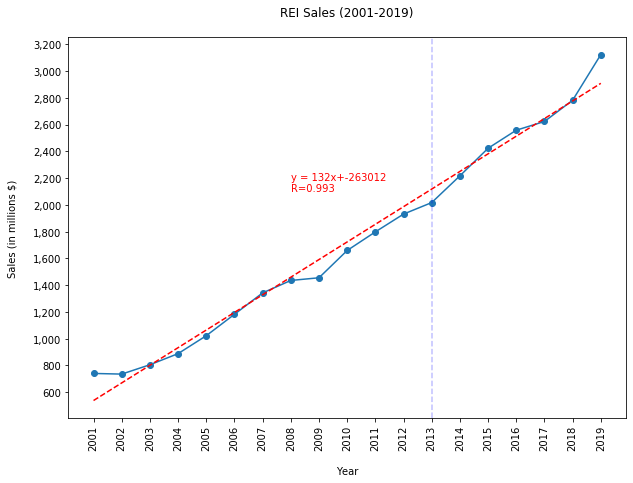

In [6]:
rei_x=rei_clean['year']
rei_y=rei_clean['sales']
plt.figure(figsize=(10,7))
plt.yticks(np.arange(0,4500,200))
plt.xticks(np.arange(2001,2020,1),rotation=90)
plt.ylabel('Sales (in millions $)\n')
plt.xlabel('\nYear')


plt.plot(rei_x,rei_y,marker='o')#color='lightskyblue')


line1=st.linregress(year_2001,sales_2001)
line2=st.linregress(year_2010,sales_2010)
line3=st.linregress(rei_x,rei_y)

x1=np.arange(year_2001.min(),year_2001.max()+1,1)
x2=np.arange(year_2010.min(),year_2010.max()+1,1)
x3=np.arange(rei_x.min(),rei_x.max()+1,1)

eq1 = f"y = {int(round(line1[0]))}x+{int(round(line1[1]))}\nR={round(line1[2],3)}"
eq2 = f"y = {int(round(line2[0]))}x+{int(round(line2[1]))}\nR={round(line2[2],3)}"
eq3 = f"y = {int(round(line3[0]))}x+{int(round(line3[1]))}\nR={round(line3[2],3)}"

line_1 = x1*line1[0] + line1[1]
line_2 = x2*line2[0] + line2[1]
line_3 = x3*line3[0] + line3[1]

#plt.plot(x1,line_1,"r--",alpha=.5)
#plt.plot(x2,line_2,"r--",alpha=.5)
plt.plot(x3,line_3,"r--",alpha=1)

#plt.annotate(eq1,(2005,700),color='red')
#plt.annotate(eq2,(2014,2900),color='red')
plt.annotate(eq3,(2008,2100),color='red')

plt.title('REI Sales (2001-2019)\n')
plt.axvline(x=2013,ls='--',color='blue',alpha=.25)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.savefig("../plots/rei_sales.png")
plt.show()

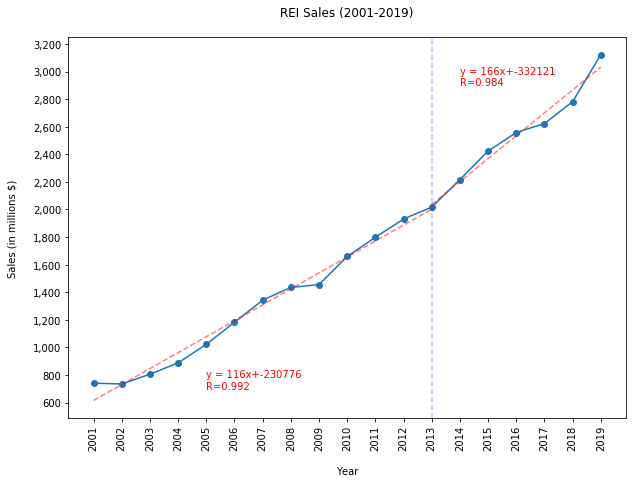

In [7]:
plt.figure(figsize=(10,7))
plt.yticks(np.arange(0,4500,200))
plt.xticks(np.arange(2001,2020,1),rotation=90)
plt.ylabel('Sales (in millions $)\n')
plt.xlabel('\nYear')


plt.plot(rei_x,rei_y,marker='o')#color='lightskyblue')

plt.plot(x1,line_1,"r--",alpha=.5)
plt.plot(x2,line_2,"r--",alpha=.5)

plt.annotate(eq1,(2005,700),color='red')
plt.annotate(eq2,(2014,2900),color='red')

plt.title('REI Sales (2001-2019)\n')
plt.axvline(x=2013,ls='--',color='blue',alpha=.25)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


plt.savefig("../plots/rei_sales_2013.png")
plt.show()

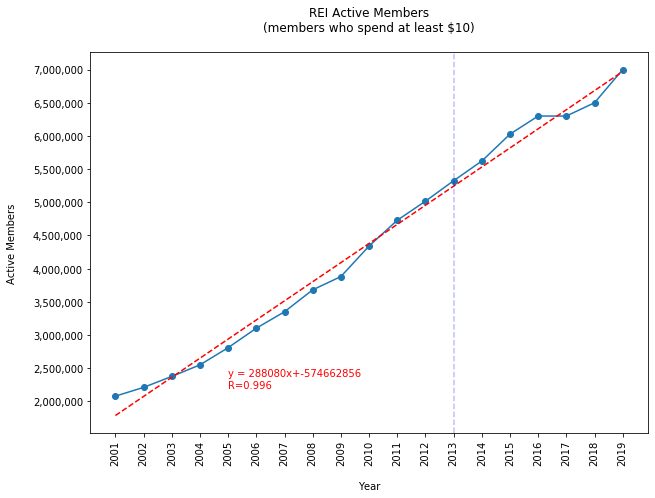

In [8]:
member_x=rei_clean['year']
member_y=rei_clean['active_members']
plt.figure(figsize=(10,7))
plt.xticks(np.arange(2001,2020,),rotation=90)
plt.yticks(np.arange(1000000,8000000,500000))

plt.ylabel('Active Members\n')
plt.xlabel('\nYear')

plt.plot(member_x,member_y,marker='o')


line1=st.linregress(year_2001,member_2001)
line2=st.linregress(year_2010,member_2010)
line3=st.linregress(member_x,member_y)
x1=np.arange(year_2001.min(),year_2001.max()+1,1)
x2=np.arange(year_2010.min(),year_2010.max()+1,1)
x3=np.arange(member_x.min(),member_x.max()+1,1)

#eq1 = f"y = {int(round(line1[0]))}x+{int(round(line1[1]))}\nR={round(line1[2],2)}"
#eq2 = f"y = {int(round(line2[0]))}x+{int(round(line2[1]))}\nR={round(line2[2],2)}"
eq3 = f"y = {int(round(line3[0]))}x+{int(round(line3[1]))}\nR={round(line3[2],3)}"

line_1 = x1*line1[0] + line1[1]
line_2 = x2*line2[0] + line2[1]
line_3 = x3*line3[0] + line3[1]

#plt.plot(x1,line_1,"r--")
#plt.plot(x2,line_2,"r--")
plt.plot(x3,line_3,"r--")

#plt.annotate(eq1,(2003,2000000),color='red')
#plt.annotate(eq2,(2013.5,6890000),color='red')
plt.annotate(eq3,(2005,2200000),color='red')


plt.title('REI Active Members\n(members who spend at least $10)\n')

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.axvline(x=2013,ls='--',color='blue',alpha=.25)

plt.savefig("../plots/rei_members.png")

plt.show()